# w266 Final Project

## Clickbait Classification
#### K Iwasaki, Sohad Desai, Phat Doan
#### Spring 2018

## Setting up Environment

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import sys
import os
import time
import datetime

from scipy import stats, integrate
import matplotlib.pyplot as p
import seaborn as sns
sns.set(color_codes=True)

## Data Preparation

In [2]:
URL1 = '../../data/clickbait/clickbait_data'
URL2 = '../../data/clickbait/non_clickbait_data'

import pandas as pd
clickbait = pd.read_csv(URL1, sep="\n", names=['title'])
nonclickbait = pd.read_csv(URL2, sep="\n", names=['title'])

clickbait['category'] = 1
nonclickbait['category'] = 0

data = pd.concat([clickbait, nonclickbait])

data = data.sample(frac=1).reset_index(drop=True)

data['idx'] = data.index
data['idx'] = data['idx'].map(int)

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

train.to_csv('train.csv', sep='|', index = False)
test.to_csv('test.csv', sep='|', index = False)

## Helper Functions

In [ ]:
## Pre-processing title
def pre_processing(string):
    

## EDA

*Showing titles*

In [3]:
clickbait.head()

,title,category
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [4]:
nonclickbait.head()

,title,category
0,Bill Changing Credit Card Rules Is Sent to Oba...,0
1,"In Hollywood, the Easy-Money Generation Toughe...",0
2,1700 runners still unaccounted for in UK's Lak...,0
3,Yankees Pitchers Trade Fielding Drills for Put...,0
4,Large earthquake rattles Indonesia; Seventh in...,0


*Number of clickbaits versus non-clickbaits*

In [5]:
clickbait.shape

(15999, 2)

In [6]:
nonclickbait.shape

(16001, 2)

*Length per title*

In [10]:
clickbait['title_length'] = clickbait.apply(lambda row: len(row['title']), axis=1)
clickbait.head()

,title,category,title_length
0,Should I Get Bings,1,18
1,Which TV Female Friend Group Do You Belong In,1,45
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,73
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,67
4,A Couple Did A Stunning Photo Shoot With Their...,1,100


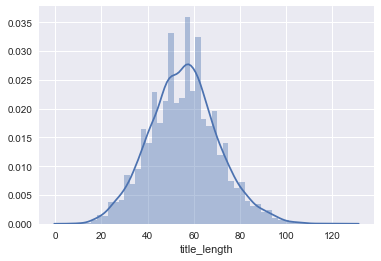

In [13]:
sns.distplot(clickbait['title_length'])

In [11]:
nonclickbait['title_length'] = nonclickbait.apply(lambda row: len(row['title']), axis=1)
nonclickbait.head()

,title,category,title_length
0,Bill Changing Credit Card Rules Is Sent to Oba...,0,74
1,"In Hollywood, the Easy-Money Generation Toughe...",0,51
2,1700 runners still unaccounted for in UK's Lak...,0,72
3,Yankees Pitchers Trade Fielding Drills for Put...,0,59
4,Large earthquake rattles Indonesia; Seventh in...,0,55


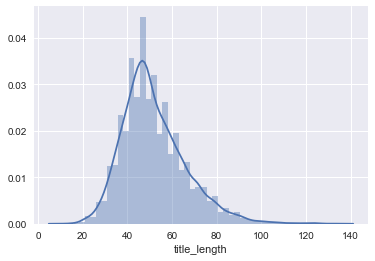

In [14]:
sns.distplot(nonclickbait['title_length'])